In [1]:
import json
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import PIL

# Annotations creation

In [2]:
annot_json = os.listdir('../data/annotations/')

In [3]:
annot_json

['instances_val2014.json',
 'captions_train2014.json',
 'captions_val2014.json',
 'instances_train2014.json',
 'person_keypoints_train2014.json',
 'person_keypoints_val2014.json']

In [4]:
captions_json = [i for i in annot_json if "captions" in i and "train" in i][0]

In [5]:
captions_json

'captions_train2014.json'

In [6]:
annot = json.load(open('../data/annotations/captions_train2014.json','r'))

In [7]:
annot.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [8]:
annot['images'][:2], annot['annotations'][:2]

([{'license': 5,
   'file_name': 'COCO_train2014_000000057870.jpg',
   'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg',
   'height': 480,
   'width': 640,
   'date_captured': '2013-11-14 16:28:13',
   'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
   'id': 57870},
  {'license': 5,
   'file_name': 'COCO_train2014_000000384029.jpg',
   'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000384029.jpg',
   'height': 429,
   'width': 640,
   'date_captured': '2013-11-14 16:29:45',
   'flickr_url': 'http://farm3.staticflickr.com/2422/3577229611_3a3235458a_z.jpg',
   'id': 384029}],
 [{'image_id': 318556,
   'id': 48,
   'caption': 'A very clean and well decorated empty bathroom'},
  {'image_id': 116100,
   'id': 67,
   'caption': 'A panoramic view of a kitchen and all of its appliances.'}])

In [9]:
captions = [i['caption'] for i in annot['annotations']]

In [10]:
n_captions = len(captions)

In [11]:
n_captions, len(set(captions))

(414113, 400962)

In [12]:
image_ids = [i['image_id'] for i in annot['annotations']]

In [13]:
from collections import Counter
counter = Counter(image_ids)
set(counter.values())

{5, 6, 7}

In [14]:
Counter(counter.values())

Counter({5: 82586, 6: 196, 7: 1})

## zomming to those that are related to people

In [15]:
def check_caption(x):
    words = ['boy', 'girl', 'guy', 'person', 'women', 'child', 'man']
    x = x.replace('.','').replace(',','').split(' ')
    return set(x).intersection(words)
        

In [16]:
captions_with_people = [i for i in captions if check_caption(i)]

In [17]:
len(captions_with_people)

84713

In [18]:
annot_with_people = [i for i in annot['annotations'] if check_caption(i['caption'])]

In [19]:
ids_with_people = [i['image_id'] for i in annot_with_people]

In [20]:
len(ids_with_people), len(set(ids_with_people))

(84713, 28647)

In [21]:
images = dict([(i['id'], (i['height'], i['width'], i['file_name'])) for i in annot['images']])

In [22]:
people_annot = {}
for label_info in annot_with_people:
    id = label_info['image_id']
    image_info = images[id]
    filename = image_info[-1]
    labels = people_annot.get(filename, [])
    labels.append(label_info['caption'])
    people_annot.update({filename:labels})

In [25]:
print(len(people_annot))

28647


## visualization of annotations

['A person picks up a slice of pizza using two serving utensils.', 'a person is cutting in to a pizza']


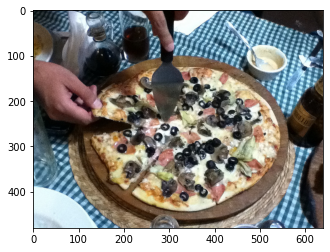

In [23]:
abs_path = '../data/train2014/'
idx = np.random.choice(range(len(people_annot)))
path, labels = list(people_annot.items())[idx]
image = np.array(PIL.Image.open(os.path.join(abs_path,path)))
plt.imshow(image);
print(labels)

## saving new annotations

In [24]:
if not os.path.exists('../data/new_annotations'):
    os.mkdir('../data/new_annotations')
with open('../data/new_annotations/annot.json', 'w') as f:
    json.dump(people_annot,f)